# Healthier tasty recipes recommender system

In [37]:
# Imports

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def print_bold(str):
    print('\033[1m' + str + '\033[0m')

## 1. Preprocessing

### 1.1 Look at the raw data

#### Recipes from the Kaggle dataset

In [23]:
# Load raw data
kaggle_train_raw = json.load(open('../data/kaggle/train.json'))  
kaggle_test_raw = json.load(open('../data/kaggle/test.json'))
    
print("The length of the train set before any cleaning is: " + str(len(kaggle_train_raw)))
print("The length of the train set before any cleaning is: " + str(len(kaggle_test_raw)))
print_bold("Number of recipe in the Kaggle dataset before cleaning: " + str(len(kaggle_train_raw) + len(kaggle_test_raw)))

kaggle_train_raw[0]

The length of the train set before any cleaning is: 39774
The length of the train set before any cleaning is: 9944
Number of recipe in the Kaggle dataset before cleaning: 49718


{'cuisine': 'greek',
 'id': 10259,
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

#### Recipes from the "From cookies to cooks" dataset

In [24]:
# Load raw data
cookies_to_cook_file = open("../data/recipeClean/ingredients.txt", mode='r', buffering=-1, encoding="ISO-8859-1", errors=None, newline=None, closefd=True, opener=None)
cookies_to_cook_raw = cookies_to_cook_file.readlines()

print_bold("Number of recipe in the \"From cookies to cooks\" dataset before cleaning: " + str(len(cookies_to_cook_raw)))

cookies_to_cook_raw[:1]

Number of recipe in the "From cookies to cooks" dataset before cleaning: 64249


['20f6f98261da097ba0b6fe4ba159b3c1.html\tbettycrocker.com\thttp://www.bettycrocker.com/recipes/wild-rice-soup/1ca76b2d-c859-4083-bfdd-9f4549267675\tWild Rice Soup\t2 tablespoons butter or margarine|2 medium stalks celery, sliced (1 cup)|1 medium carrot, coarsely shredded (1 cup)|1 medium onion, chopped (1/2 cup)|1 small green bell pepper, chopped (1/2 cup)|3 tablespoons Gold medalÂ® all-purpose flour|1/4 teaspoon pepper|1 pouch (from 10-ounce package) frozen cooked wild rice (1 1/4 cups)|1 cup water|1 can (10 1/2 ounces) condensed chicken broth|1 cup half-and-half|1/3 cup slivered almonds, toasted, if desired|1/4 cup chopped fresh parsley\n']

#### Recipes from the 1M dataset

In [27]:
# Load raw data

recipes_1m_raw = json.load(open("../data/1M/recipe1M_layers/layer1.json"))    

print_bold("Number of recipe in the 1M dataset before cleaning: " + str(len(recipes_1m_raw)))

recipes_1m_raw[:1]

Number of recipe in the 1M dataset before cleaning: 1029720


[{'id': '000018c8a5',
  'ingredients': [{'text': '6 ounces penne'},
   {'text': '2 cups Beechers Flagship Cheese Sauce (recipe follows)'},
   {'text': '1 ounce Cheddar, grated (1/4 cup)'},
   {'text': '1 ounce Gruyere cheese, grated (1/4 cup)'},
   {'text': '1/4 to 1/2 teaspoon chipotle chili powder (see Note)'},
   {'text': '1/4 cup (1/2 stick) unsalted butter'},
   {'text': '1/3 cup all-purpose flour'},
   {'text': '3 cups milk'},
   {'text': '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)'},
   {'text': '2 ounces semisoft cheese (page 23), grated (1/2 cup)'},
   {'text': '1/2 teaspoon kosher salt'},
   {'text': '1/4 to 1/2 teaspoon chipotle chili powder'},
   {'text': '1/8 teaspoon garlic powder'},
   {'text': '(makes about 4 cups)'}],
  'instructions': [{'text': 'Preheat the oven to 350 F. Butter or oil an 8-inch baking dish.'},
   {'text': 'Cook the penne 2 minutes less than package directions.'},
   {'text': '(It will finish cooking in the oven.)'},
   {'text': 'R

### 1.2 The cleaning procedure

The cleaning procedure allows us to have meaningful ingredient to use but also to standardize the ingredients from each dataset <br>

Summary of the procedure: <br>
- remove parenthesis and their content
- remove a set of special characters
- remove dangling letters
- remove the digits
- remove commas and everything that follow them
- remove a set of words considered as garbage (to_remove file)
- remove the adjectives (e.g. sliced, seared, ...)
- remove the alternative (everything that come after a 'or' is discarded)
- split ingredients that contains the word 'and' into two ingredients
- singularize every word


You can look into this procedure more in-depth either in the clean_recipes_datasets notebook or in the clean_recipes_datasets python script from which we use a few functions accross our scripts.

### 1.3 Look at the data after cleaning

#### Recipes from the Kaggle dataset

In [31]:
kaggle = json.load(open('../generated/clean_kaggle.json'))  
    
print("The length of the train set before any cleaning is: " + str(len(kaggle)))
print_bold("Number of recipe in the Kaggle dataset before cleaning: " + str(len(kaggle)))

kaggle[0]

The length of the train set before any cleaning is: 49718
Number of recipe in the Kaggle dataset before cleaning: 49718


['romaine lettuce',
 'black olife',
 'grape tomato',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo bean',
 'feta cheese']

> The structure of the JSON is changed to keep only the ingredients. The cleaning procedure has singularized each ingredient.

#### Recipes from the "From cookies to cooks" dataset

In [32]:
cookies_to_cooks = json.load(open('../generated/clean_cookies.json'))  
    
print("The length of the train set before any cleaning is: " + str(len(cookies_to_cooks)))
print_bold("Number of recipe in the Kaggle dataset before cleaning: " + str(len(cookies_to_cooks)))

cookies_to_cooks[0]

The length of the train set before any cleaning is: 47045
Number of recipe in the Kaggle dataset before cleaning: 47045


['butter',
 'stalks celery',
 'carrot',
 'onion',
 'green bell pepper',
 'gold medalâ® all-purpose flour',
 'pepper',
 'rice ',
 'water',
 'chicken broth',
 'half-and-half',
 'almond',
 'parsley']

> This dataset is the one that requires cleaning the most. After cleaning we lost 27% of the recipes

#### Recipes from the 1M dataset

In [33]:
one_m = json.load(open('../generated/clean_1m.json'))  
    
print("The length of the train set before any cleaning is: " + str(len(one_m)))
print_bold("Number of recipe in the Kaggle dataset before cleaning: " + str(len(one_m)))

one_m[0]

The length of the train set before any cleaning is: 869654
Number of recipe in the Kaggle dataset before cleaning: 869654


['elbow macaroni',
 'american cheese',
 'celery',
 'green pepper',
 'pimento',
 'mayonnaise',
 'vinegar',
 'salt',
 'dill weed']

> We lost 15% of the recipes from this dataset during the cleaning procedure

## 2. Data analysis

In [38]:
# We merge our three datasets into one
all_recipes = kaggle + cookies_to_cooks + one_m

#### 2.1 Number of ingredients per recipe

The maximum of ingredients in a recipe is: 99


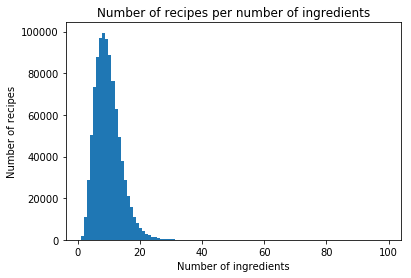

In [39]:
counts = list(map(lambda r: len(r),all_recipes))

counts = sorted(counts, reverse=True)
print('The maximum of ingredients in a recipe is: '+str(counts[0]))

plt.hist(counts, bins=100)
plt.title('Number of recipes per number of ingredients')
plt.xlabel('Number of ingredients')
plt.ylabel('Number of recipes')
plt.show()

#### 2.2 Number of unique ingredients

In [41]:
all_ingr = []
for r in all_recipes:
    for i in r:
        all_ingr.append(i)
        
df_recipe = pd.Series(all_ingr)

print('There are ' + str(len(df_recipe.unique())) + ' different ingredients')

There are 38182 different ingredients


> This is a huge number of ingredients, even considering our number of recipes. It is likely that a lot of ingredients are in fact some noise that we failed to filter during the parsing. To be sure we need to look at the distribution of the ingredients.

#### 2.3 Distribution of the ingredients

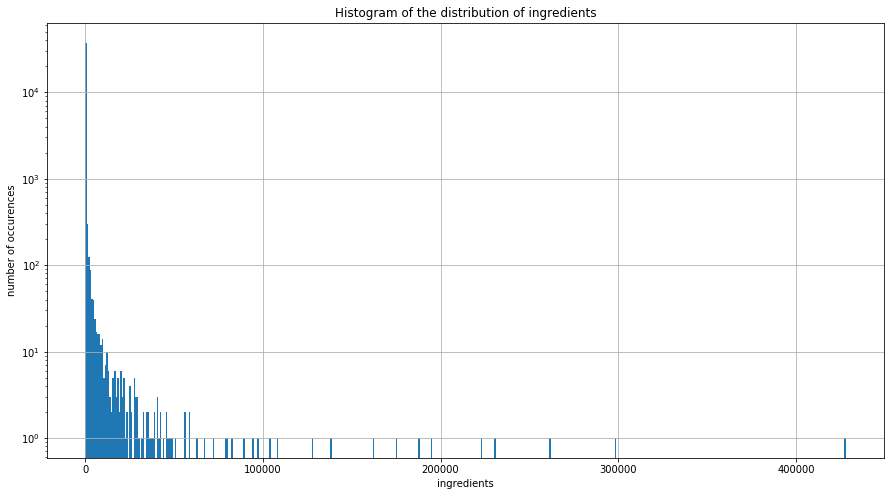

In [42]:
count_table = df_recipe.value_counts().to_frame().rename({0:'count'}, axis = 1)
ax = count_table['count'].hist(bins=500,figsize=(15, 8))
ax.set_yscale('log')
ax.set_title('Histogram of the distribution of ingredients')
ax.set_ylabel('number of occurences')
ax.set_xlabel('ingredients')
plt.show()

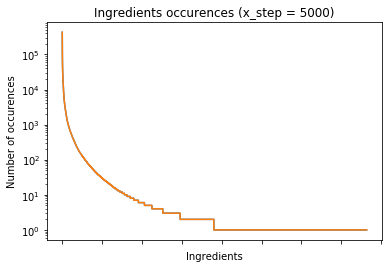

In [44]:
# Log scale

ax = count_table['count'].plot(logy=True)
ax.set_xlabel('Ingredients')
ax.set_ylabel('Number of occurences')
ax.set_title('Ingredients occurences (x_step = 5000)')
plt.show()

> Indeed, a lot of ingredients appear only a few times and we will not be able to extract some rules from them. Therefore, we decided to only keep the ignredients that appear in more than 15 recipes.

In [46]:
without_junk = count_table[count_table['count'] > 15]
print_bold("We keep "+ str(100*((without_junk['count'].sum()) / count_table.sum())[0])[:5]+\
      "% of the data if we discard ingredients that appear in less than 15 recipes.")

We keep 99.13% of the data if we discard ingredients that appear in less than 15 recipes.


## 3. USDA Mapping